In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
## Define pot global parameters 

large = 22
medium = 16
small = 12

params = {
    "figure.figsize": (12, 10),
    "axes.titlesize": large,
    "axes.labelsize": medium,
    "legend.fontsize": large,
    "xtick.labelsize": medium,
    "ytick.labelsize": medium,
}

plt.rcParams.update(params)


## Changing the style of your graph
plt.style.use('seaborn-whitegrid')
sns.set_style('white')

In [3]:
%%time 
data = pd.read_csv('USC_Ticketing_Membership_LACMAFund_Sept2018_Sept2019.csv', encoding = "ISO-8859-1")

Wall time: 5.42 s


In [4]:
data.head()

,order_no,customer_no,order_dt,appeal_no,Appeal,source_no,source_name,MOS,MOS.1,price_type,PriceType,ticket_no,due_amt,fee_amt,perf_no,perf_type,description,season,description.1,zone_no,description.2,recipient_no
0,1040147,2039167,9/1/2018,1,Web,1,Default Web Source,3,Web Mode of Sale,18.0,Adult,1680352.0,25.0,2.0,12799.0,3.0,General Admission,43.0,FY19TIX,529.0,LACMA 99,NaN
1,1040147,2039167,9/1/2018,1,Web,1,Default Web Source,3,Web Mode of Sale,18.0,Adult,1680353.0,25.0,2.0,12799.0,3.0,General Admission,43.0,FY19TIX,529.0,LACMA 99,NaN
2,1040147,2039167,9/1/2018,1,Web,1,Default Web Source,3,Web Mode of Sale,18.0,Adult,1680354.0,25.0,2.0,12799.0,3.0,General Admission,43.0,FY19TIX,529.0,LACMA 99,NaN
3,1040153,148964,9/1/2018,1,Web,1,Default Web Source,3,Web Mode of Sale,64.0,LACMA Member,1712525.0,0.0,NaN,15577.0,6.0,Films,44.0,FY19FILM,425.0,Bing Theater,NaN
4,1040153,148964,9/1/2018,1,Web,1,Default Web Source,3,Web Mode of Sale,64.0,LACMA Member,1712526.0,0.0,NaN,15577.0,6.0,Films,44.0,FY19FILM,425.0,Bing Theater,NaN


In [5]:
data_members = data[data.customer_no != 0]
data_nonmembers = data[data.customer_no == 0]

## Histogram of ticket sources 

#### Members and non-members

In [6]:
def sources_freq_frame(data, thers = 0.1):
    sources_freq = (data.source_name.value_counts())[['Onsite', 'Default Web Source', 'MSA Source']].reset_index()
    return sources_freq

In [7]:
sources_freq_mem = sources_freq_frame(data_members, 1)
sources_freq_mem

,index,source_name
0,Onsite,109863
1,Default Web Source,59453
2,MSA Source,25141


In [8]:
sources_freq_nonmem = sources_freq_frame(data_nonmembers, 1)
sources_freq_nonmem

,index,source_name
0,Onsite,429334
1,Default Web Source,4
2,MSA Source,10238


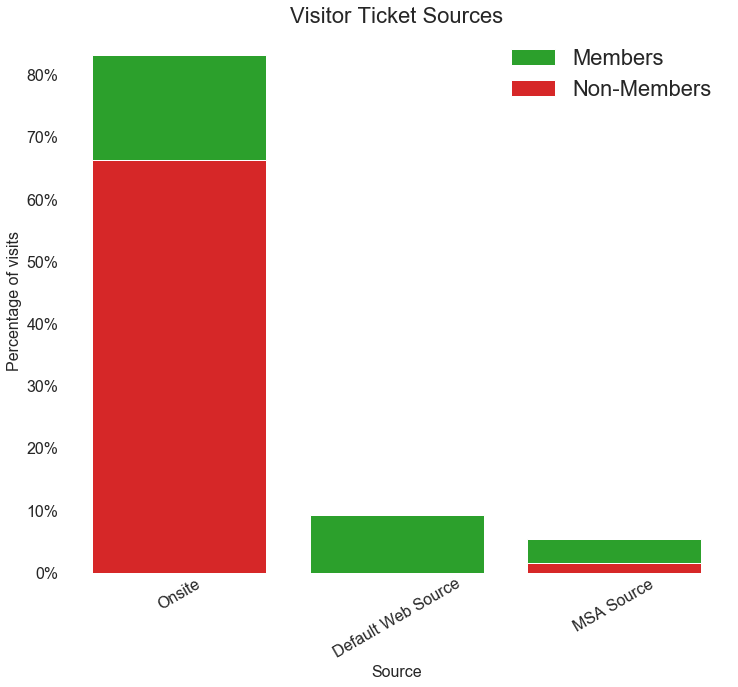

In [9]:
plt.figure()

plt.bar(x = sources_freq_mem['index'],
        height = (sources_freq_mem['source_name']+sources_freq_nonmem['source_name']) * 100 / data.shape[0],
        color = 'tab:green',
        label = 'Members')

plt.bar(x = sources_freq_nonmem['index'],
        height = sources_freq_nonmem['source_name'] * 100 / data.shape[0],
        color = 'tab:red',
        label = 'Non-Members')

ax = plt.gca()
ax.grid(0)
vals = ax.get_yticks()
ax.set_yticklabels([str(int(x))+'%' for x in vals])

plt.box(0)
    
plt.title('Visitor Ticket Sources')
plt.xlabel('Source')
plt.ylabel("Percentage of visits")
plt.xticks(rotation = 30)
plt.legend()
plt.show()

#### Member

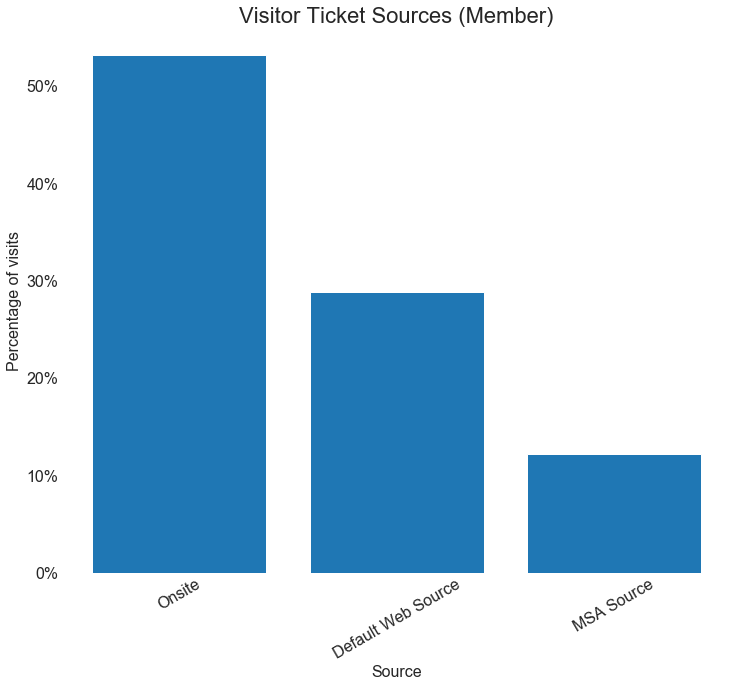

In [10]:
plt.figure()

plt.bar(x = sources_freq_mem['index'], height = sources_freq_mem['source_name'] * 100 / data_members.shape[0], color = 'tab:blue')

ax = plt.gca()
ax.grid(0)
vals = ax.get_yticks()
ax.set_yticklabels([str(int(x))+'%' for x in vals])

plt.box(0)

plt.title('Visitor Ticket Sources (Member)')
plt.xlabel('Source')
plt.ylabel("Percentage of visits")
plt.xticks(rotation = 30)
plt.show()

#### Non-member

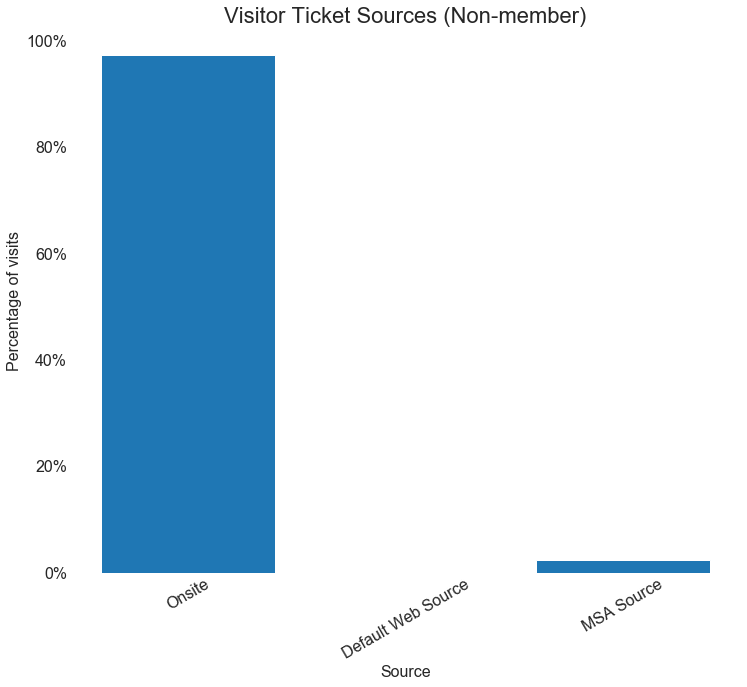

In [11]:
plt.figure()

plt.bar(x = sources_freq_nonmem['index'], height = sources_freq_nonmem['source_name'] * 100 / data_nonmembers.shape[0], color = 'tab:blue')

ax = plt.gca()
ax.grid(0)
vals = ax.get_yticks()
ax.set_yticklabels([str(int(x))+'%' for x in vals])

plt.box(0)

plt.title('Visitor Ticket Sources (Non-member)')
plt.xlabel('Source')
plt.ylabel("Percentage of visits")
plt.xticks(rotation = 30)
plt.show()

## Description histogram

#### Members and non-members

In [12]:
def desc_freq_frame(data, thers = 0.1):
    desc_freq = (data.description.value_counts())[['General Admission', 'Films', 'Membership', 'RSVP Event', 'Paid Event', 'Adult Class']].reset_index()
    return desc_freq

In [13]:
desc_freq_mem = desc_freq_frame(data_members)
desc_freq_mem

,index,description
0,General Admission,143199
1,Films,22516
2,Membership,20282
3,RSVP Event,13261
4,Paid Event,3333
5,Adult Class,656


In [14]:
desc_freq_nonmem = desc_freq_frame(data_nonmembers)
desc_freq_nonmem

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:951: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


,index,description
0,General Admission,427817.0
1,Films,4998.0
2,Membership,113.0
3,RSVP Event,1410.0
4,Paid Event,504.0
5,Adult Class,NaN


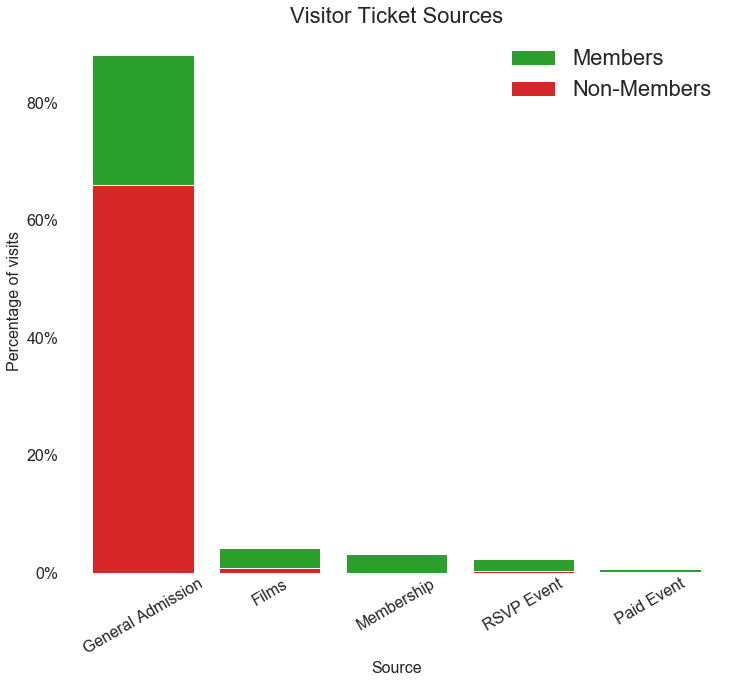

In [15]:
plt.figure()

plt.bar(x = desc_freq_mem['index'],
        height = (desc_freq_mem['description']+desc_freq_nonmem['description']) * 100 / 647765,
        color = 'tab:green',
        label = 'Members')

plt.bar(x = desc_freq_nonmem['index'],
        height = desc_freq_nonmem['description'] * 100 / 647765,
        color = 'tab:red',
        label = 'Non-Members')

ax = plt.gca()
ax.grid(0)
vals = ax.get_yticks()
ax.set_yticklabels([str(int(x))+'%' for x in vals])

plt.box(0)
    
plt.title('Visitor Ticket Sources')
plt.xlabel('Source')
plt.ylabel("Percentage of visits")
plt.xticks(rotation = 30)
plt.legend()
plt.show()

### Members 

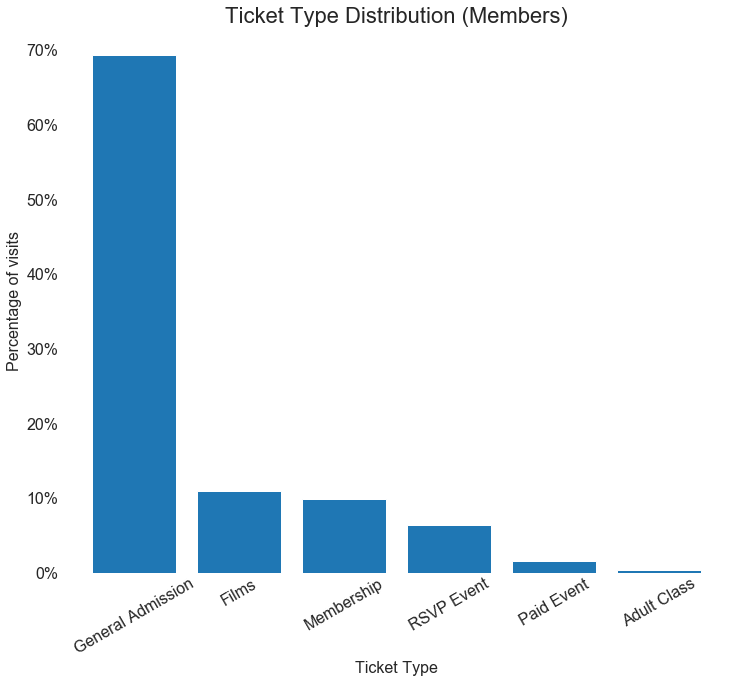

In [16]:
plt.figure()

plt.bar(x = desc_freq_mem['index'], height = desc_freq_mem['description'] / data_members.shape[0] * 100, color = 'tab:blue')

ax = plt.gca()
ax.grid(0)
vals = ax.get_yticks()
ax.set_yticklabels([str(int(x))+'%' for x in vals])

plt.box(0)

plt.title('Ticket Type Distribution (Members)')
plt.xlabel('Ticket Type')
plt.ylabel("Percentage of visits")
plt.xticks(rotation = 30)
plt.show()

#### Non-Members 

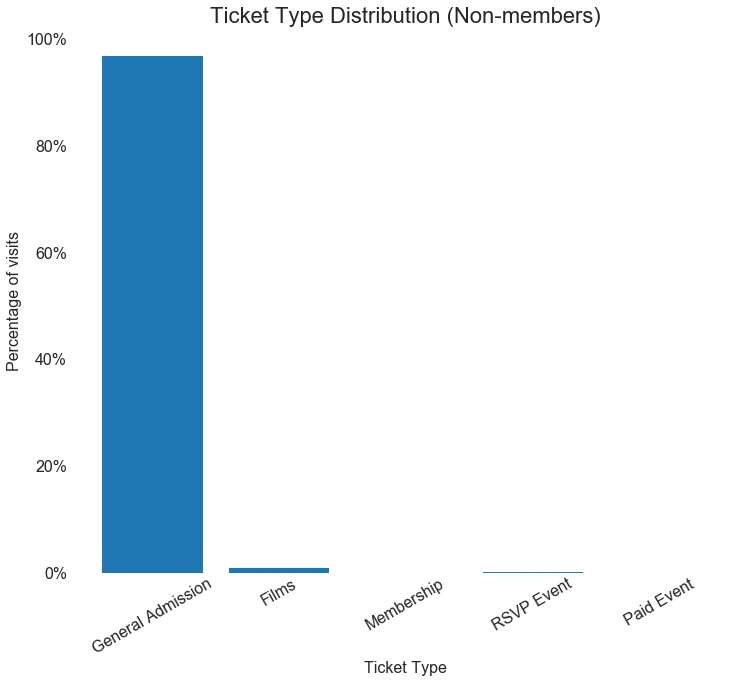

In [17]:
plt.figure()

plt.bar(x = desc_freq_nonmem['index'], height = desc_freq_nonmem['description'] / data_nonmembers.shape[0] * 100, color = 'tab:blue')

ax = plt.gca()
ax.grid(0)
vals = ax.get_yticks()
ax.set_yticklabels([str(int(x))+'%' for x in vals])

plt.box(0)

plt.title('Ticket Type Distribution (Non-members)')
plt.xlabel('Ticket Type')
plt.ylabel("Percentage of visits")
plt.xticks(rotation = 30)
plt.show()

### Price Type Distribution 

In [18]:
pricetype_mask = ['LACMA Member', 'LACMA Member Guest', 'Adult', 'NexGenLA Adult Guest', 'NexGenLA Youth Member', 'Senior (65+)', 
    'Student (with ID)', 'Teen (13–17)', 'Youth (0–12)']

In [19]:
pricetype_freq = (data.PriceType.value_counts() / data.shape[0] * 100).loc[pricetype_mask].reset_index()
pricetype_freq.dropna(inplace=True)
pricetype_freq.sort_values('PriceType', ascending=False, inplace=True)
pricetype_freq

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,index,PriceType
2,Adult,15.953625
0,LACMA Member,12.856514
6,Student (with ID),6.453729
5,Senior (65+),2.633671
3,NexGenLA Adult Guest,0.922866
1,LACMA Member Guest,0.859417
4,NexGenLA Youth Member,0.638349


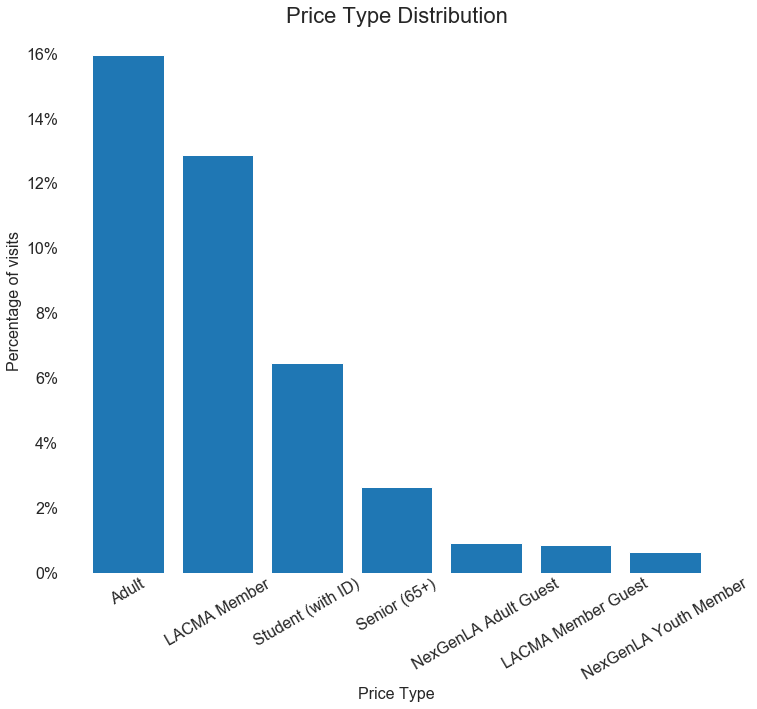

In [23]:
plt.figure()

plt.bar(x = 'index', height = 'PriceType', data = pricetype_freq, color = 'tab:blue')

ax = plt.gca()
ax.grid(0)
vals = ax.get_yticks()
ax.set_yticklabels([str(int(x))+'%' for x in vals])

plt.box(0)

plt.title('Price Type Distribution')
plt.xlabel('Price Type')
plt.ylabel("Percentage of visits")
plt.xticks(rotation = 30)
plt.show()